# **Exploratory Data Analysis**

**BY: Kajol Rafi, Emile Pascoe, Elliot Martin, Christian Durán**

_Big Data in Media Technology_

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## **Initial Data Exploration**

In [3]:
# Reading wine data and loading it into a dataframe
df = pd.read_csv('wine_reviews.csv')

In [4]:
# Show top 5 records
df.head()

,Name,Variety,Origin,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price
0,Chateau Du Caillau Cahors 2021,Malbec,"Cahors, Southwest, France",Red Wine,Green Wine,750.0,13.0,Deep intense ruby color. Ripe fruit on the nos...,COMMENTARY: The 2021 Chateau du Caillau is gen...,5.0,19.0,13.99,21.99
1,Coates and Seely Brut Reserve,Non-Vintage Sparkling Wine,England,Sparkling & Champagne,NaN,750.0,12.0,"A blend of Chardonnay and Pinot Noir, with res...",There's no rule that English sparkling wines m...,4.4,33.0,41.99,NaN
2,Emilio Moro Polvorete 2022,Godello,"Bierzo, Spain",White Wine,NaN,750.0,13.5,NaN,"A round and balanced white with green apples, ...",4.8,14.0,17.99,19.99
3,Bodegas La Purisma Old Vines Red Blend 2019,Other Red Blends,"Yecla, Spain",Red Wine,NaN,750.0,14.5,"La Purisima has a gorgeous black cherry color,...","An excellent blend with 85% monastrell, 10% sy...",4.4,56.0,10.99,NaN
4,La Chapelle du Bastion Picpoul de Pinet 2022,Picpoul,"Picpoul de Pinet, Languedoc, South of France, ...",White Wine,Screw Cap,750.0,12.5,Blend: 100% Picpoul Blanc,COMMENTARY: The 2022 Le Chapelle du Bastion Pi...,4.2,91.0,11.99,NaN


The main insight on the data with this visualization is that the origin value comes in different formats for each wine. Some wines have several values inside the origin columns, so data cleaning is needed in order to extract the data correctly. 

In [5]:
# Revising data types, amount of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208199 entries, 0 to 208198
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Name                207982 non-null  object 
 1   Variety             203519 non-null  object 
 2   Origin              203503 non-null  object 
 3   Attr_1              206376 non-null  object 
 4   Attr_2              42608 non-null   object 
 5   Alcohol_vol         207982 non-null  float64
 6   Alcohol_percentage  207982 non-null  float64
 7   Winemaker_notes     56088 non-null   object 
 8   Review              52645 non-null   object 
 9   Avg_rating          28015 non-null   float64
 10  N_ratings           28015 non-null   float64
 11  Price_Out-of-stock  207950 non-null  object 
 12  Price               49776 non-null   object 
dtypes: float64(4), object(9)
memory usage: 20.6+ MB


As it can be seen. Most of the wine pages does not have a winemaker note or a sommelier review. We can infer that this is due to the quality of the wine or they being a more commercial wine. For our prediction based on natural language we can consider only the records that do have the reviews present.

Further notice comes around when speaking about the Origin Column, nulls need to be droped in order to have it as a way to predict ratings.

Another observation is that the data types for Price_Out-of-stock and Price should be float 64, so more exploration on this columns needs to be done.

## **Data Cleaning**

### _Origin_

The main approach to clean this column is to split its data in different column. Starting by getting all the values into a list inside the same column and then create multiple columns for each origin value.

In [6]:
# Dropping Nulls
df2 = df.dropna(subset=['Origin'])

# Stripping end whitespace
df2['Origin'] = df2['Origin'].str.rstrip()

df2['Origin'].head()

0                            Cahors, Southwest, France
1                                              England
2                                        Bierzo, Spain
3                                         Yecla, Spain
4    Picpoul de Pinet, Languedoc, South of France, ...
Name: Origin, dtype: object

Data is split by commas, so splitting by that character should work.

In [7]:
# Spliting data based on commas for the origin column
df3 = df2.copy()

df3['Origin_List'] = df2['Origin'].str.split(',').apply(lambda x : x[::-1])

df3['Origin_List'].head(5)

0                        [ France,  Southwest, Cahors]
1                                            [England]
2                                     [ Spain, Bierzo]
3                                      [ Spain, Yecla]
4    [ France,  South of France,  Languedoc, Picpou...
Name: Origin_List, dtype: object

In [8]:
# Using the explode function from pandas in order to create different columns for each item in Origin_List
df4 = df3.copy()

# define a function to split the list into columns
def split_list(row):
    return pd.Series(row['Origin_List'])

# apply the function to the DataFrame
new_df4 = df4.apply(split_list, axis=1).rename(columns=lambda x: f"Origin_{x+1}")

# merge the new DataFrame with the original DataFrame
result_df4 = pd.concat([df4, new_df4], axis=1).drop(['Origin_List', 'Origin'], axis=1)

# Update the df3 dataframe
df4 = result_df4.copy()

df4.head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price,Origin_1,Origin_2,Origin_3,Origin_4,Origin_5
0,Chateau Du Caillau Cahors 2021,Malbec,Red Wine,Green Wine,750.0,13.0,Deep intense ruby color. Ripe fruit on the nos...,COMMENTARY: The 2021 Chateau du Caillau is gen...,5.0,19.0,13.99,21.99,France,Southwest,Cahors,NaN,NaN
1,Coates and Seely Brut Reserve,Non-Vintage Sparkling Wine,Sparkling & Champagne,NaN,750.0,12.0,"A blend of Chardonnay and Pinot Noir, with res...",There's no rule that English sparkling wines m...,4.4,33.0,41.99,NaN,England,NaN,NaN,NaN,NaN
2,Emilio Moro Polvorete 2022,Godello,White Wine,NaN,750.0,13.5,NaN,"A round and balanced white with green apples, ...",4.8,14.0,17.99,19.99,Spain,Bierzo,NaN,NaN,NaN
3,Bodegas La Purisma Old Vines Red Blend 2019,Other Red Blends,Red Wine,NaN,750.0,14.5,"La Purisima has a gorgeous black cherry color,...","An excellent blend with 85% monastrell, 10% sy...",4.4,56.0,10.99,NaN,Spain,Yecla,NaN,NaN,NaN
4,La Chapelle du Bastion Picpoul de Pinet 2022,Picpoul,White Wine,Screw Cap,750.0,12.5,Blend: 100% Picpoul Blanc,COMMENTARY: The 2022 Le Chapelle du Bastion Pi...,4.2,91.0,11.99,NaN,France,South of France,Languedoc,Picpoul de Pinet,NaN


In [9]:
# Stripping whitespaces in the origin columns
df5 = df4.copy()

for col in df4.columns[-5:]:
    df5[col] = df4[col].str.lstrip().str.rstrip()

df5.iloc[0]['Origin_1']

'France'

In [10]:
# Checking the unique values of origin_1 column
df5['Origin_1'].value_counts()

California            62181
France                42739
Italy                 31021
Spain                 12375
Australia              9034
Washington             7115
Oregon                 6345
Argentina              5737
South Africa           4714
Chile                  4623
New Zealand            3769
Portugal               3055
Other U.S.             2901
Austria                2500
Germany                1830
Greece                  927
Israel                  868
Hungary                 380
Canada                  194
Slovenia                170
Other                   150
Mexico                  132
Croatia                 127
Switzerland              91
Turkey                   79
South America            78
Lebanon                  67
Uruguay                  63
Japan                    61
Country of Georgia       57
England                  41
Moldova                  25
Macedonia (FYROM)        22
Brazil                    9
Armenia                   8
Bulgaria            

It cna be seen how Origin_1 corresponds to the country of production. There are some cleaning remaining due to the California / Other U.S. entries.

For this cases we consider that, as we are going to classify this column as country, it is important to change California to United States.

In [106]:
# Defining a function to clean us territories
def clean_country(row):
    row2 = row.copy()
    if row['Origin_1'] in ['California', 'Oregon', 'Washington']:
        for i in range(-5, 0, 1): # Loop to move the origin data 1 column
            if i < 0 and i+1 < 0:
                row.iloc[i+1] = row2.iloc[i]
        row.iloc[-5] = 'United States' # Replace the origin_1 column with United States
    elif row['Origin_1'] == 'Other U.S.':
        row['Origin_1'] = 'United States' # Change Other U.S. to United States
    elif row['Origin_1'] == 'Macedonia (FYROM)':
        row['Origin_1'] = 'Macedonia'
    return row

# Replacing values in the origin_1 column
df6 = df5.copy()

# Apply cleaning function and renaming columns
df6 = df6.apply(clean_country, axis=1).rename(columns={'Origin_1':'Country','Origin_2':'Region'})

df6[(df6['Country'] == 'United States')].head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price,Country,Region,Origin_3,Origin_4,Origin_5
36,Goldschmidt Vineyard Alexander Valley Chelsea ...,Merlot,Red Wine,NaN,750.0,14.5,"Dark garnet in color with cherry, strawberry, ...","This has an earthy character with dark fruit, ...",4.7,36.0,22.99,NaN,United States,California,Sonoma County,Alexander Valley,NaN
55,Morgan Highland Chardonnay 2020,Chardonnay,White Wine,NaN,750.0,13.8,The grapes were hand picked and sorted in the ...,White peach and creamy butter aromas are cut b...,4.2,7.0,23.99,27.99,United States,California,Central Coast,Monterey,Santa Lucia Highlands
65,Ammunition Cabernet Sauvignon 2020,Cabernet Sauvignon,Red Wine,NaN,750.0,14.5,"Dark garnet velvet in color and texture, this ...",Blended with small amounts of Petit Verdot and...,4.1,68.0,18.99,NaN,United States,California,Central Coast,Paso Robles,NaN
67,Ammunition Pinot Noir 2020,Pinot Noir,Red Wine,NaN,750.0,14.2,Ripe black cherry framed by a subtle oakiness ...,Sourced from Carneros and the Russian River Va...,4.5,57.0,18.99,NaN,United States,California,Sonoma County,NaN,NaN
68,Patent Wines Sauvignon Blanc 2021,Sauvignon Blanc,White Wine,NaN,750.0,14.2,Aromas of lemon/lime and honey suckle with a t...,Exotic flavors of jasmine keep an elo- quent a...,5.0,21.0,34.99,NaN,United States,California,Napa Valley,Yountville,NaN


In [107]:
# Verify if there are any repeated regions amongst Region and Origin 3
temp1 = pd.DataFrame(df6['Region'].value_counts().sort_index()).rename(columns={'Region':'Counts'})

temp2 = pd.DataFrame(df6['Origin_3'].value_counts().sort_index()).rename(columns={'Origin_3':'Counts'})

temp3 = temp1.join(temp2, how='inner', lsuffix='_1', rsuffix='_2')

temp3.shape[0]

0

In [108]:
# Rename the columns accordingly to their content and dropping unneccessary ones
df7 = df6.copy()

df7 = df6.drop(['Origin_4', 'Origin_5'], axis=1).rename(columns={'Origin_3':'Zone'})

df7.head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price,Country,Region,Zone
0,Chateau Du Caillau Cahors 2021,Malbec,Red Wine,Green Wine,750.0,13.0,Deep intense ruby color. Ripe fruit on the nos...,COMMENTARY: The 2021 Chateau du Caillau is gen...,5.0,19.0,13.99,21.99,France,Southwest,Cahors
1,Coates and Seely Brut Reserve,Non-Vintage Sparkling Wine,Sparkling & Champagne,NaN,750.0,12.0,"A blend of Chardonnay and Pinot Noir, with res...",There's no rule that English sparkling wines m...,4.4,33.0,41.99,NaN,England,NaN,NaN
2,Emilio Moro Polvorete 2022,Godello,White Wine,NaN,750.0,13.5,NaN,"A round and balanced white with green apples, ...",4.8,14.0,17.99,19.99,Spain,Bierzo,NaN
3,Bodegas La Purisma Old Vines Red Blend 2019,Other Red Blends,Red Wine,NaN,750.0,14.5,"La Purisima has a gorgeous black cherry color,...","An excellent blend with 85% monastrell, 10% sy...",4.4,56.0,10.99,NaN,Spain,Yecla,NaN
4,La Chapelle du Bastion Picpoul de Pinet 2022,Picpoul,White Wine,Screw Cap,750.0,12.5,Blend: 100% Picpoul Blanc,COMMENTARY: The 2022 Le Chapelle du Bastion Pi...,4.2,91.0,11.99,NaN,France,South of France,Languedoc


### _Price and Price_Out-of-stock_

In [109]:
# Starting with changing the object columns to float64 datatype
df8 = df7.copy()

df8['Price_Out-of-stock'] = pd.to_numeric(df7['Price_Out-of-stock'].str.replace('$', ''), errors='coerce')
df8['Price'] = pd.to_numeric(df7['Price'].str.replace('$', ''), errors='coerce')
num_columns = df8.select_dtypes(exclude=['object']).columns.tolist()

df8[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203503 entries, 0 to 208198
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Alcohol_vol         203503 non-null  float64
 1   Alcohol_percentage  203503 non-null  float64
 2   Avg_rating          27721 non-null   float64
 3   N_ratings           27721 non-null   float64
 4   Price_Out-of-stock  202786 non-null  float64
 5   Price               48600 non-null   float64
dtypes: float64(6)
memory usage: 10.9 MB


In [110]:
# Checking missing values
for col in num_columns:
    missing_vals = df8[col].isnull().sum()
    percentage = np.round(missing_vals/df6.shape[0], decimals=4)*100
    print(f'Missing values for {col}: {missing_vals} ({percentage}%)')

Missing values for Alcohol_vol: 0 (0.0%)
Missing values for Alcohol_percentage: 0 (0.0%)
Missing values for Avg_rating: 175782 (86.38%)
Missing values for N_ratings: 175782 (86.38%)
Missing values for Price_Out-of-stock: 717 (0.35000000000000003%)
Missing values for Price: 154903 (76.12%)


We can see that there are over $70 \% $ missing values in the following columns: 

* Avg_rating: $86.38\%$
* N_ratings: $86.38\%$
* Price: $76.12\%$

We need to tackle this with either imputation, dropping these columns, or maybe add a missingness indicator column for each of these columns.

In regards to the Price columns there is an issue we need to discuss before making any transformations to the data. First of all, some wines are not available to buy on the website, so they don't have a Price value, but they do have a Price_Out-of-stock value. In this case, we can create a different feature in order to solve the huge number of null values for the Price columns

In [111]:
# Creating a new feature called Price_Feature considering Price if available, if not use Price_Out-of-stock
def get_price_feature(row):
    if np.isnan(row['Price']):
        row['Price_Feature'] = row['Price_Out-of-stock']
    else:
        row['Price_Feature'] = row['Price']
    row.drop(['Price', 'Price_Out-of-stock'])
    return row

df9 = df8.copy()

df9 = df9.apply(get_price_feature, axis=1)

df9.head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price,Country,Region,Zone,Price_Feature
0,Chateau Du Caillau Cahors 2021,Malbec,Red Wine,Green Wine,750.0,13.0,Deep intense ruby color. Ripe fruit on the nos...,COMMENTARY: The 2021 Chateau du Caillau is gen...,5.0,19.0,13.99,21.99,France,Southwest,Cahors,21.99
1,Coates and Seely Brut Reserve,Non-Vintage Sparkling Wine,Sparkling & Champagne,NaN,750.0,12.0,"A blend of Chardonnay and Pinot Noir, with res...",There's no rule that English sparkling wines m...,4.4,33.0,41.99,NaN,England,NaN,NaN,41.99
2,Emilio Moro Polvorete 2022,Godello,White Wine,NaN,750.0,13.5,NaN,"A round and balanced white with green apples, ...",4.8,14.0,17.99,19.99,Spain,Bierzo,NaN,19.99
3,Bodegas La Purisma Old Vines Red Blend 2019,Other Red Blends,Red Wine,NaN,750.0,14.5,"La Purisima has a gorgeous black cherry color,...","An excellent blend with 85% monastrell, 10% sy...",4.4,56.0,10.99,NaN,Spain,Yecla,NaN,10.99
4,La Chapelle du Bastion Picpoul de Pinet 2022,Picpoul,White Wine,Screw Cap,750.0,12.5,Blend: 100% Picpoul Blanc,COMMENTARY: The 2022 Le Chapelle du Bastion Pi...,4.2,91.0,11.99,NaN,France,South of France,Languedoc,11.99


In [112]:
# Checking the null values now that the Price_Feature was created
df9 = df9.drop(['Price', 'Price_Out-of-stock'], axis=1)

(df9.shape[0] - df9['Price_Feature'].isnull().sum()) / df9.shape[0]

0.9965749890665002

**_99.6%_ of records now have a Price Feature**, solving the problem of the huge amount of null values. This way is plausible to approach the problem due to the fact that Price tags aren't available if the wine is out-of-stock, but that doesn't mean that that particular wine doesn't have price.

### _Year_

In [113]:
# Extracting the year of the wine from its name
df10 = df9.copy()

# Extracting the 
df10['Year'] = df9['Name'].str.findall(' ([1-9]\d{3})').apply(lambda x : np.nan if len(x) == 0 else x[-1]).str.lstrip()
df10['Year'] = pd.to_numeric(df10['Year'], errors='coerce')

# Replacing the numbers that do not correspond to a year
df10['Year'] = np.where(df10['Year'] < 1800, np.nan, df10['Year'])

# Changing the data type to integer
df10['Year'] = df10['Year'].astype('Int64')

# Stripping the year from the name column
df10['Name'] = df9['Name'].str.replace(r'\b\d{4}\b|\b\d{2}\b', '').str.rstrip()

# Check the number of nulls in this new column
(df10.shape[0] - df10['Year'].isnull().sum()) / df10.shape[0]

0.9922261588281254

**_99.2%_ of records now have a Year in its name**, taking this into account we can use this as a new feature.

### _Rewiew_

In [94]:
df10['Review'].head()

0    COMMENTARY: The 2021 Chateau du Caillau is gen...
1    There's no rule that English sparkling wines m...
2    A round and balanced white with green apples, ...
3    An excellent blend with 85% monastrell, 10% sy...
4    COMMENTARY: The 2022 Le Chapelle du Bastion Pi...
Name: Review, dtype: object

It is easy to see how there are some reviews that contain a "COMMENTARY: " text before the actual review text, so we need to strip this text with an empty space. And while we are at it we can also rstrip() the text to avoid any leftover whitespaces at the end of the text from the web scrapping process.

In [115]:
# Replacing "COMMENTARY: " with an empty space
df11 = df10.copy()

df11['Review'] = df10['Review'].str.replace('COMMENTARY: ', '').str.rstrip()

df11['Review'].head()

0    The 2021 Chateau du Caillau is generous and we...
1    There's no rule that English sparkling wines m...
2    A round and balanced white with green apples, ...
3    An excellent blend with 85% monastrell, 10% sy...
4    The 2022 Le Chapelle du Bastion Picpoul de Pin...
Name: Review, dtype: object

In [116]:
# Reorder the columns
wine_reviews = df11[['Name', 'Variety', 'Country', 'Region', 'Zone', 'Attr_1', 'Attr_2', 'Winemaker_notes', 'Review',
                    'Alcohol_percentage', 'Alcohol_vol', 'Avg_rating', 'N_ratings', 'Price_Feature', 'Year']]

wine_reviews.head()

,Name,Variety,Country,Region,Zone,Attr_1,Attr_2,Winemaker_notes,Review,Alcohol_percentage,Alcohol_vol,Avg_rating,N_ratings,Price_Feature,Year
0,Chateau Du Caillau Cahors,Malbec,France,Southwest,Cahors,Red Wine,Green Wine,Deep intense ruby color. Ripe fruit on the nos...,The 2021 Chateau du Caillau is generous and we...,13.0,750.0,5.0,19.0,21.99,2021
1,Coates and Seely Brut Reserve,Non-Vintage Sparkling Wine,England,NaN,NaN,Sparkling & Champagne,NaN,"A blend of Chardonnay and Pinot Noir, with res...",There's no rule that English sparkling wines m...,12.0,750.0,4.4,33.0,41.99,<NA>
2,Emilio Moro Polvorete,Godello,Spain,Bierzo,NaN,White Wine,NaN,NaN,"A round and balanced white with green apples, ...",13.5,750.0,4.8,14.0,19.99,2022
3,Bodegas La Purisma Old Vines Red Blend,Other Red Blends,Spain,Yecla,NaN,Red Wine,NaN,"La Purisima has a gorgeous black cherry color,...","An excellent blend with 85% monastrell, 10% sy...",14.5,750.0,4.4,56.0,10.99,2019
4,La Chapelle du Bastion Picpoul de Pinet,Picpoul,France,South of France,Languedoc,White Wine,Screw Cap,Blend: 100% Picpoul Blanc,The 2022 Le Chapelle du Bastion Picpoul de Pin...,12.5,750.0,4.2,91.0,11.99,2022


## **EDA**

### **_Numerical Columns_**

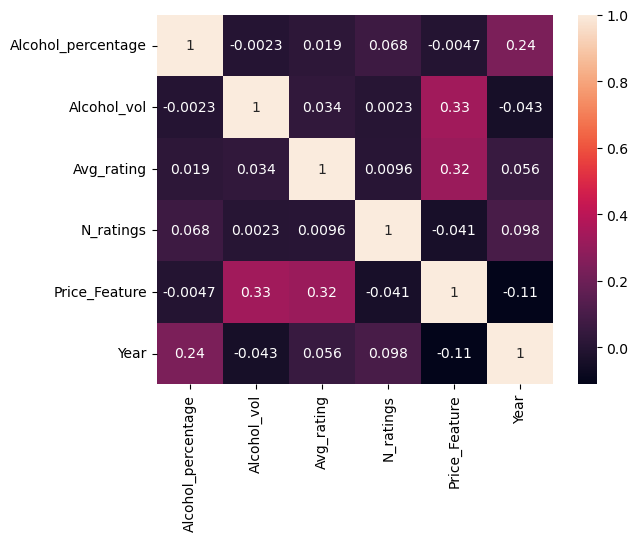

In [117]:
# Getting the new numerical columns
num_columns = wine_reviews.select_dtypes(exclude=['object']).columns.tolist()

# Check correlation between numerical columns
sns.heatmap(wine_reviews[num_columns].corr(), annot=True);

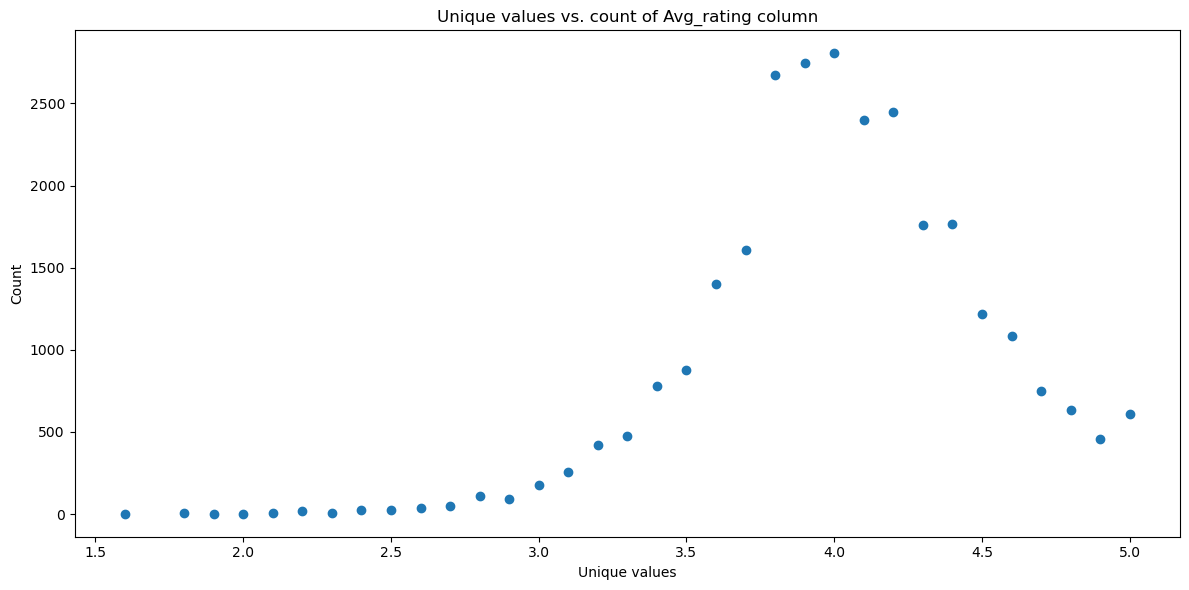

In [118]:
# If we're classifying based on the Avg_rating variable, it might be looking into the distribution of values
# Might need to 'bucket' values so we avoid it becoming a regression problem

vals = wine_reviews['Avg_rating'].value_counts()
vals_sorted =  vals.sort_index()

uniques = vals_sorted.index
count = vals_sorted.values

plt.figure(figsize=(12,6))
plt.scatter(uniques, count)
plt.xlabel("Unique values")
plt.ylabel("Count")
plt.title("Unique values vs. count of Avg_rating column")

plt.tight_layout()
plt.show()

### **_Categorical Columns_**

In [119]:
# Getting all categorical columns
cat_columns = wine_reviews.select_dtypes(include=['object']).columns.tolist()

wine_reviews[cat_columns].head()

,Name,Variety,Country,Region,Zone,Attr_1,Attr_2,Winemaker_notes,Review
0,Chateau Du Caillau Cahors,Malbec,France,Southwest,Cahors,Red Wine,Green Wine,Deep intense ruby color. Ripe fruit on the nos...,The 2021 Chateau du Caillau is generous and we...
1,Coates and Seely Brut Reserve,Non-Vintage Sparkling Wine,England,NaN,NaN,Sparkling & Champagne,NaN,"A blend of Chardonnay and Pinot Noir, with res...",There's no rule that English sparkling wines m...
2,Emilio Moro Polvorete,Godello,Spain,Bierzo,NaN,White Wine,NaN,NaN,"A round and balanced white with green apples, ..."
3,Bodegas La Purisma Old Vines Red Blend,Other Red Blends,Spain,Yecla,NaN,Red Wine,NaN,"La Purisima has a gorgeous black cherry color,...","An excellent blend with 85% monastrell, 10% sy..."
4,La Chapelle du Bastion Picpoul de Pinet,Picpoul,France,South of France,Languedoc,White Wine,Screw Cap,Blend: 100% Picpoul Blanc,The 2022 Le Chapelle du Bastion Picpoul de Pin...


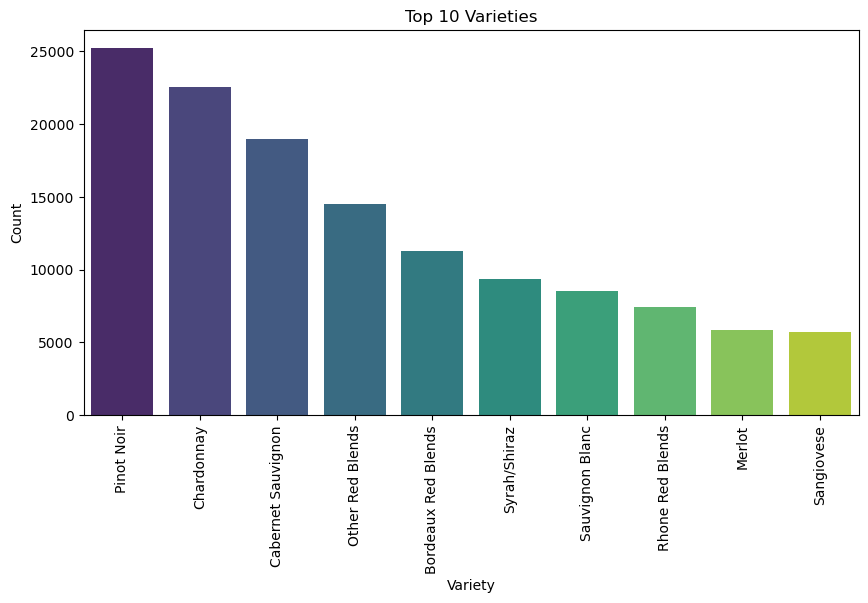

In [120]:
# Obtaining the top 10 varieties
top10_var = wine_reviews.groupby('Variety').agg({'Name':'count'}).rename(columns={'Name':'Count'}).sort_values('Count', ascending=False).head(10)

# Creating a bar chart
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Top 10 Varieties')
sns.barplot(x=top10_var.index, y=top10_var['Count'], palette='viridis');

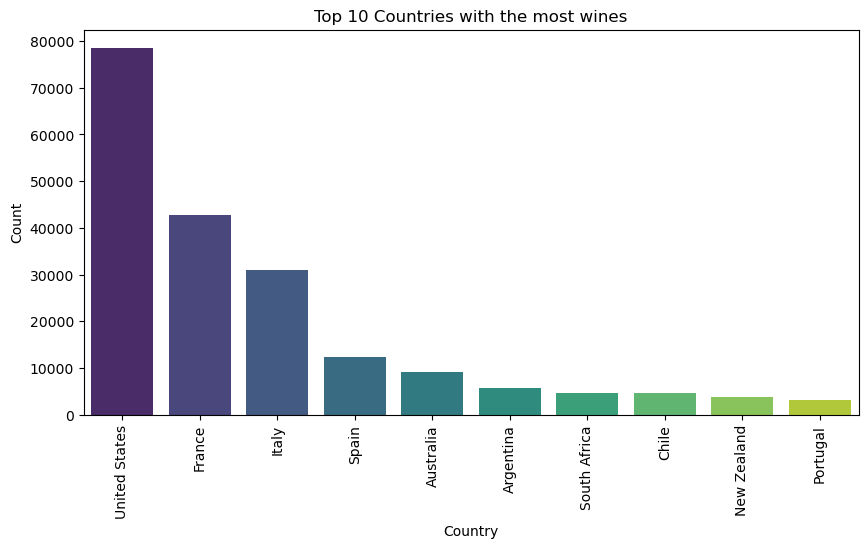

In [121]:
# Obtaining the top 10 countries
top10_con = wine_reviews.groupby('Country').agg({'Name':'count'}).rename(columns={'Name':'Count'}).sort_values('Count', ascending=False).head(10)

# Creating a bar chart
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Top 10 Countries with the most wines')
sns.barplot(x=top10_con.index, y=top10_con['Count'], palette='viridis');

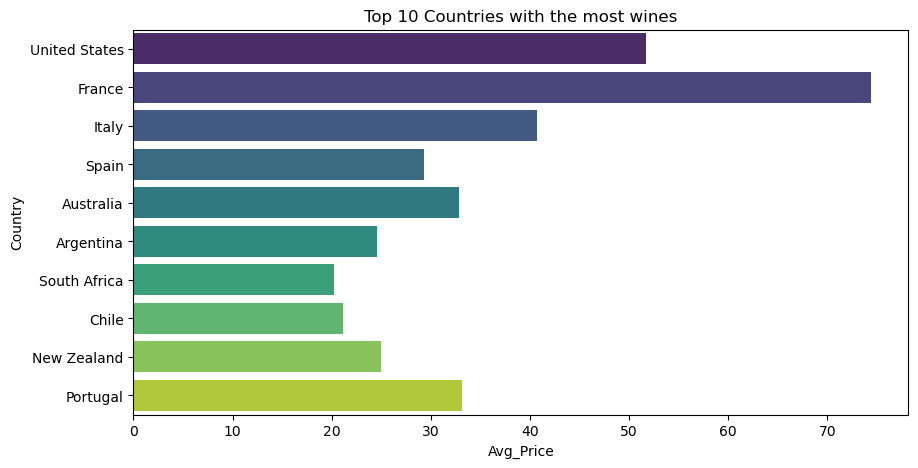

In [131]:
# Average price for the top 10 countries
avg_price_con = top10_con.join(wine_reviews.groupby('Country').agg({'Price_Feature':'mean'}), how='inner')\
    .rename(columns={'Price_Feature':'Avg_Price'})

# Creating a bar chart
plt.figure(figsize=(10,5))
plt.title('Top 10 Countries with the most wines')
ax = sns.barplot(y=avg_price_con.index, x=avg_price_con['Avg_Price'], palette='viridis', orient='h');

In [138]:
# Check the varieties most famuous in each top 10 country
wine_reviews.groupby('Country').describe(include='all').loc[top10_con.index]['Variety']

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,,,,,,,,,,,
United States,78542,104,Cabernet Sauvignon,14668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,42739,56,Pinot Noir,9079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Italy,31021,86,Sangiovese,5181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain,12375,53,Tempranillo,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,9034,60,Syrah/Shiraz,2771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,5737,46,Malbec,2522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,4714,46,Sauvignon Blanc,574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chile,4623,36,Cabernet Sauvignon,1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Zealand,3769,38,Sauvignon Blanc,1367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
